In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report
from scipy.stats import uniform as sp_uniform
import pandas as pd
import numpy as np
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
bi = pd.read_csv("/Users/fujie/Desktop/ps8/biden.csv")

In [4]:
au = pd.read_csv("/Users/fujie/Desktop/ps8/Auto.csv",na_values='?')

Question 1

a.

In [13]:
bi = bi.dropna()
y = bi["biden"].values
X = bi[["female","age","educ","dem","rep"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=25)

In [14]:
bi_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
bi_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

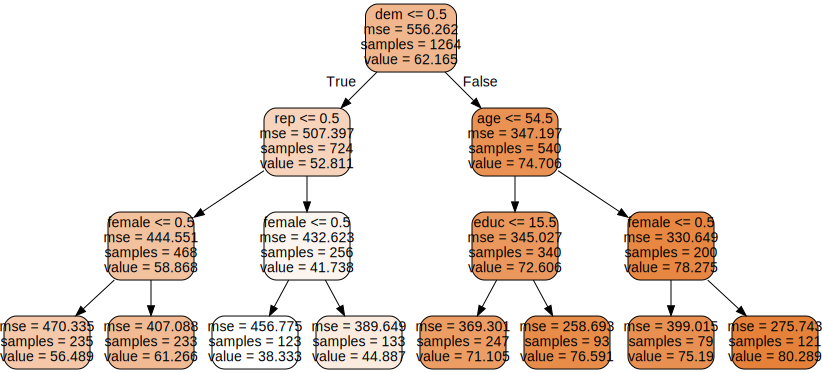

In [15]:
bi_tree_viz = export_graphviz(
    bi_tree,
    out_file=None,
    feature_names=["female","age","educ","dem","rep"],
    class_names=bi.biden,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(bi_tree_viz)
graph.render('bi_tree_viz')
graph

Interpretation:

This decision tree is split by dem,rep,age,sex and education.

For example,
The first node of the decision tree is dem(whether democrat or not). The left-hand branch of the second layer is associated with observations who are not democrat, while the right-hand branch is associated with observations who are democrat. 

Every bottom leaf is a partition of feature space. 

For example, the first leaf on the left are of 235 observations with average value of 56.489 and MSE of 470. This group represents males who are neither democracts nor republican.

We can see that the group with highest feeling thermometer is the first leaf on the right and the group with lowest feeling thermometer is the third leaf on the left.

In [8]:
y_pred = bi_tree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('Test MSE=', MSE)

Test MSE= 396.1937146321307


b.

In [9]:
from scipy.stats import randint as sp_randint
param_dist1 = {'max_depth': [3,10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

In [10]:
random_search1 = RandomizedSearchCV(bi_tree, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [11]:
random_search1.fit(X,y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)
print('MSE = ', abs(random_search1.best_score_))

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
RandBestScore1= 401.6903602232667
MSE =  401.6903602232667


Then we can know that the optimal MSE is 401.69 when max_depth is 3, min_sample_leaf is 17, and min_sample_split is 14.

c.

In [14]:
bi_forest = RandomForestRegressor(bootstrap=True,oob_score=True, random_state=25)
bi_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=25, verbose=0, warm_start=False)

In [15]:
param_dist2 = {'n_estimators':[10,200],
               'max_depth': [3,10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features':sp_randint(1,5)}

In [16]:
random_search2 = RandomizedSearchCV(bi_forest, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [17]:
random_search2.fit(X,y)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)
print('MSE = ', abs(random_search2.best_score_))

RandBestEstimator2= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
RandBestParams2= {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
RandBestScore2= 397.0681090117028
MSE =  397.0681090117028


Then we can know that the optimal MSE is 397.07 when  max_depth is 3, max_features is 2, min_sample_leaf is 17, and min_sample_split is 13.

Question 2

a.

In [5]:
au.columns=['mpg', 'cyl', 'displ', 'hpwr', 'wgt', 'accl', 'yr', 'orgn','name']
au['mpg_high'] = (au['mpg']>=au['mpg'].median()).astype('int')
au.dropna(inplace=True)
au_orgn = pd.get_dummies(au.orgn, prefix='orgn').iloc[:, :-1]
au = pd.concat([au, au_orgn], axis=1)

In [19]:
k = 4
kf = KFold(k, shuffle=True, random_state=25)
X = au[['cyl', 'displ', 'hpwr', 'wgt', 'accl', 'yr', 'orgn_1', 'orgn_2']].values
y = au.mpg_high.values
kf.get_n_splits(X)
MSE_vec_kf = np.zeros(k)
ytest = np.zeros(au.shape[0])
ypred = np.zeros(au.shape[0])

In [20]:
k_ind = int(0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ytest[test_index] = y_test
    ypred[test_index] = y_pred
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
#     print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
print('Test estimate MSE k-fold = ',MSE_kf)

Test estimate MSE k-fold =  0.09693877551020408


In [21]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

        0.0       0.92      0.89      0.90       196
        1.0       0.89      0.92      0.90       196

avg / total       0.90      0.90      0.90       392



As it is shown in the table, the error rate for mpg_high=0 is 0.08 and the error rate for mpg_high=1 is 0.11.

b.

In [22]:
random_forest = RandomForestClassifier(random_state = 25)
param_dist3 = {'n_estimators': [10, 200],
                'max_depth': [3, 8],
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 8)}
random_search3 = RandomizedSearchCV(random_forest, param_distributions=param_dist3,
                                   n_iter=100, n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')
random_search3.fit(X, y)


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=25, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 200], 'max_depth': [3, 8], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a16878c18>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10ea73710>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1686cdd8>},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='neg_mean_s

In [23]:
print('MSE = ', abs(random_search3.best_score_))
print('RandBestEstimator3=', random_search3.best_estimator_)
print('RandBestParams3=', random_search3.best_params_)
print('RandBestScore3=', -random_search3.best_score_)

MSE =  0.08928571428571429
RandBestEstimator3= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
RandBestParams3= {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
RandBestScore3= 0.08928571428571429


c.

In [6]:
X = au[['cyl', 'displ', 'hpwr', 'wgt', 'accl', 'yr', 'orgn_1', 'orgn_2']]
y = au["mpg_high"]

In [7]:
svc= SVC(kernel="rbf", degree=2) #Gaussian radial basis function
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
param_dist4 = {'C':sp_uniform(loc=0.2,scale=4.0),
               'gamma':["scale","auto_deprecated"],
               'shrinking':[True,False]}

In [9]:
random_search4 = RandomizedSearchCV(svc, param_distributions=param_dist4,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

In [10]:
random_search4.fit(X,y)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x109e2f7f0>, 'gamma': ['scale', 'auto_deprecated'], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [11]:
print('MSE = ', abs(random_search4.best_score_))
print('RandBestEstimator4=', random_search4.best_estimator_)
print('RandBestParams4=', random_search4.best_params_)
print('RandBestScore4=', -random_search4.best_score_)

MSE =  0.11479591836734694
RandBestEstimator4= SVC(C=1.8094629152568114, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)
RandBestParams4= {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
RandBestScore4= 0.11479591836734694


d.

The random forest classifier has the lowest MSE, so it is the best model to predict mpg_high